<a href="https://colab.research.google.com/github/louisdtt/ML-MNIST-F/blob/main/Notebook_MNIST_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading data

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

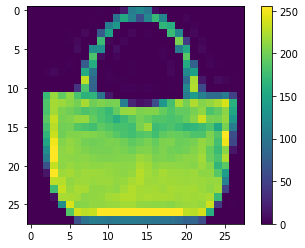

In [4]:
# Image example

plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# Values need to be between 0 and 1

train_images = train_images / 255.0

test_images = test_images / 255.0

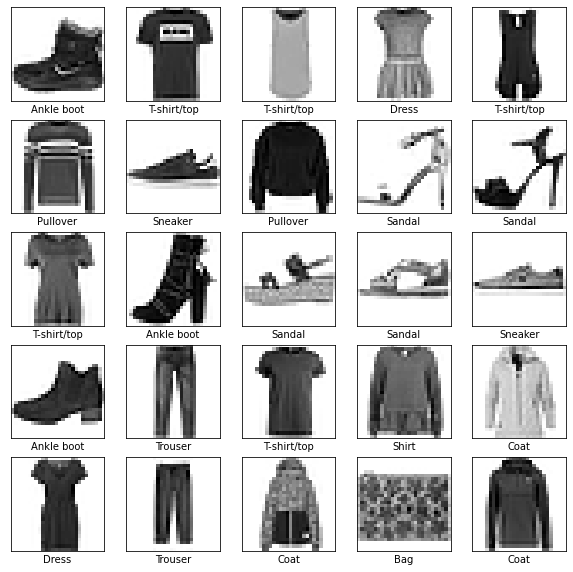

In [6]:
# 25 first images in gray scale

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [7]:
# Initilialization of the NN layers

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
# Compile

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
# Applying the model to our data

model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 1ms/step - loss: 0.6269 - accuracy: 0.7814
Epoch 2/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3778 - accuracy: 0.8632
Epoch 3/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3384 - accuracy: 0.8766
Epoch 4/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3097 - accuracy: 0.8860
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.8904
Epoch 6/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2827 - accuracy: 0.8965
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2615 - accuracy: 0.9021
Epoch 8/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2504 - accuracy: 0.9069
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2433 - accuracy: 0.9087
Epoch 10/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.235

In [11]:
# Accuracy testing

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4044 - accuracy: 0.8876

Test accuracy: 0.8876000046730042


In [12]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [13]:
predictions = probability_model.predict(test_images)

In [16]:
# Value of confidence for each category

predictions[0]

array([8.6082576e-14, 3.7171280e-20, 6.6471228e-15, 2.8731930e-22,
       2.8171567e-12, 3.8607806e-05, 2.1734231e-13, 3.0082534e-05,
       3.6848292e-11, 9.9993134e-01], dtype=float32)

In [22]:
# Max value from above

np.argmax(predictions[100])

3

In [23]:
# Check if prediction is right

test_labels[100]

3

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


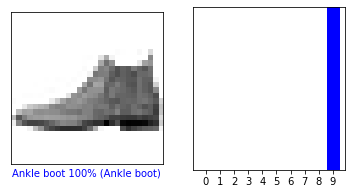

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


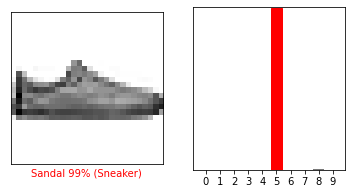

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


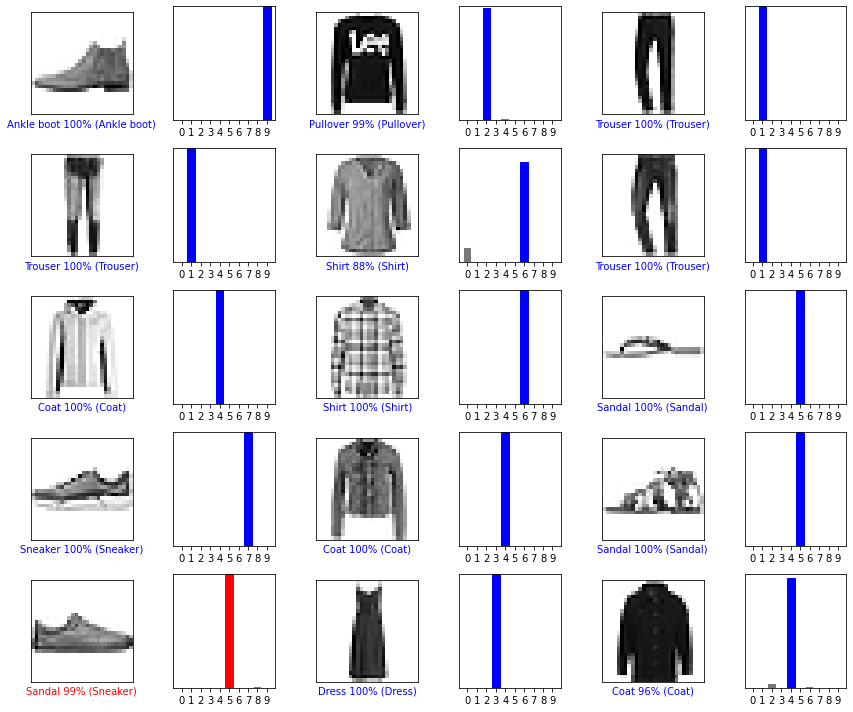

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [42]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [44]:
predictions_single = probability_model.predict(img)

print(predictions_single)


[[1.6708809e-04 3.9212954e-19 9.8986608e-01 1.1348604e-16 9.3316846e-03
  2.6444747e-23 6.3516415e-04 1.6691175e-21 6.3103529e-18 6.3849890e-23]]


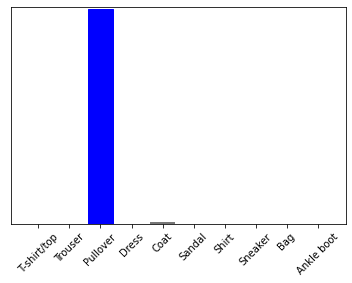

In [46]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [47]:
np.argmax(predictions_single[0])


2